Column names in dataset: ['soil_moisture', 'temperature', 'humidity', 'ph', 'rainfall', 'Pump Data']
Processing attributes: ['soil_moisture', 'temperature', 'humidity', 'ph', 'rainfall']

Processing: soil_moisture
Optimal clusters for soil_moisture: 4


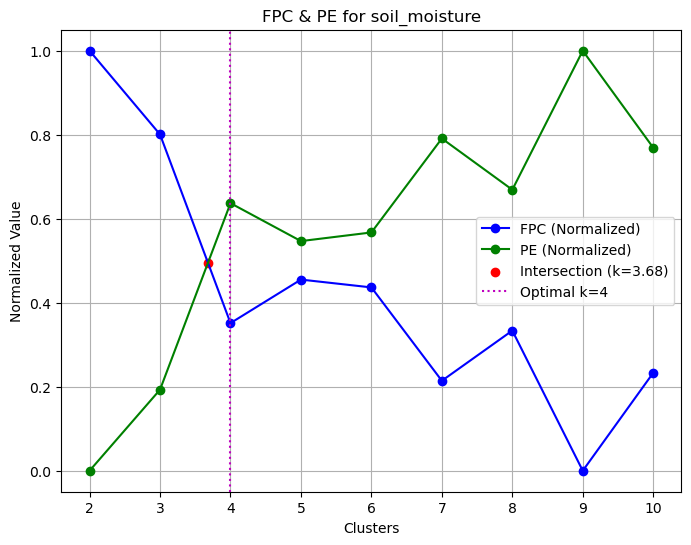

Cluster Centers for soil_moisture:
 [[12.84130297]
 [28.15336535]
 [25.17851313]
 [18.58719635]]

Cluster Analysis for soil_moisture:
                       count       mean       std        min        25%  \
soil_moisture_cluster                                                     
0                      381.0  12.656198  1.457609  10.024260  11.523066   
1                      782.0  28.270110  1.003696  26.513202  27.376283   
2                      528.0  24.904790  1.205592  22.160503  24.064694   
3                      509.0  18.566938  1.939763  15.333693  16.889636   

                             50%        75%        max  
soil_moisture_cluster                                   
0                      12.625081  13.852729  15.321627  
1                      28.352043  29.077327  29.997860  
2                      25.255489  25.784846  26.504126  
3                      18.425933  20.206656  22.082173  


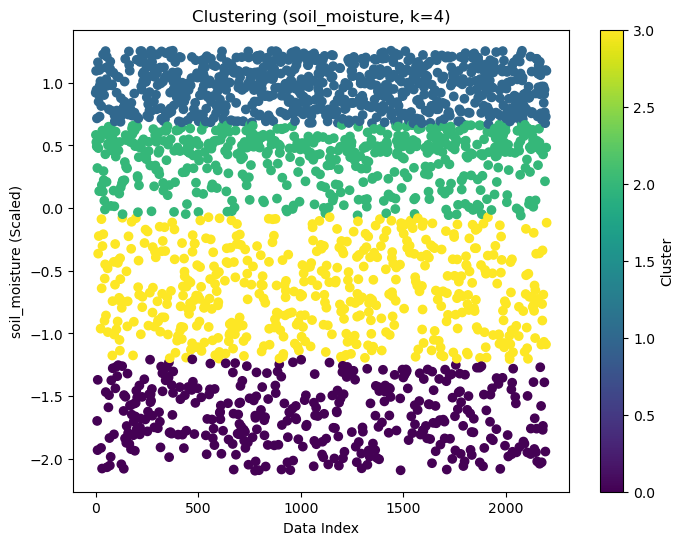


Processing: temperature
Optimal clusters for temperature: 4


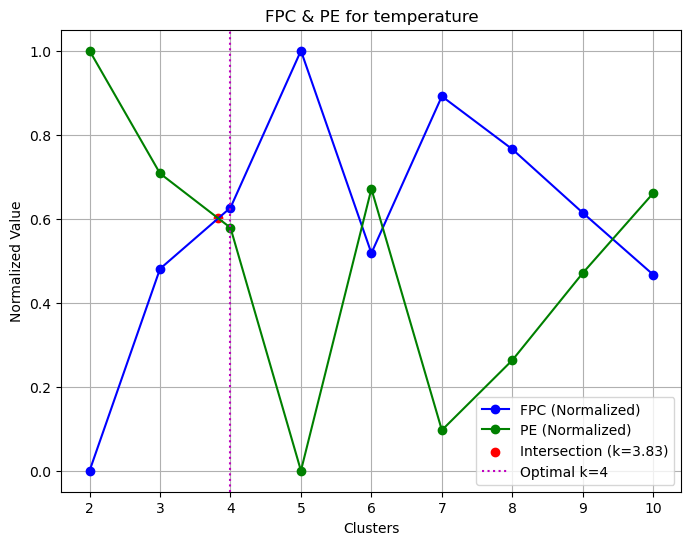

Cluster Centers for temperature:
 [[28.57768628]
 [19.80957647]
 [34.2131244 ]
 [24.29674397]]

Cluster Analysis for temperature:
                     count       mean       std        min        25%  \
temperature_cluster                                                     
0                    774.0  28.714268  1.386354  26.379785  27.653282   
1                    469.0  18.685792  2.629500   8.825675  18.064861   
2                    172.0  35.749351  3.321695  32.237978  33.197398   
3                    785.0  24.245552  1.208456  21.869274  23.280810   

                           50%        75%        max  
temperature_cluster                                   
0                    28.578288  29.631081  32.177520  
1                    19.301063  20.435178  21.841069  
2                    34.561927  38.397204  43.675493  
3                    24.307486  25.234661  26.366299  


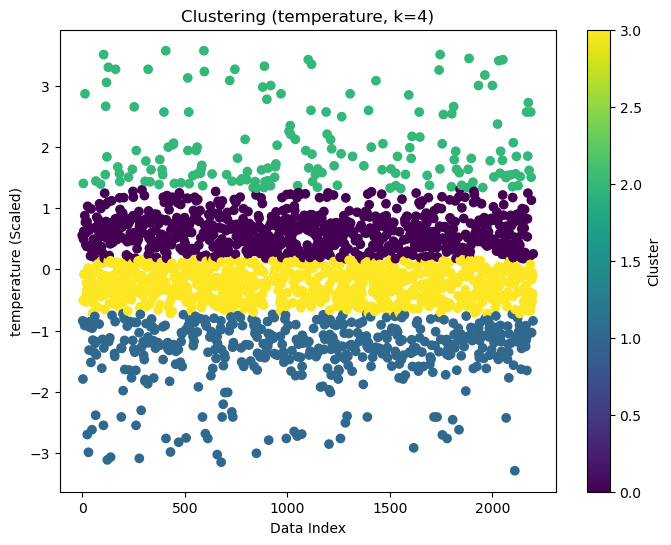


Processing: humidity
Optimal clusters for humidity: 6


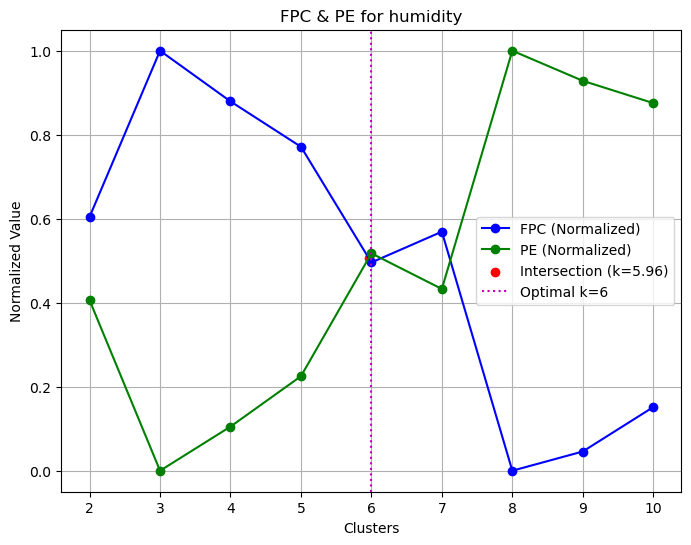

Cluster Centers for humidity:
 [[67.61275344]
 [49.51727822]
 [81.9748117 ]
 [19.36549354]
 [60.87326372]
 [92.05039352]]

Cluster Analysis for humidity:
                  count       mean       std        min        25%        50%  \
humidity_cluster                                                                
0                 227.0  68.290129  2.681358  64.348487  66.293270  68.000960   
1                 286.0  48.120389  6.043103  30.400468  45.709761  49.842134   
2                 583.0  81.947821  2.779235  74.829137  80.415905  82.119305   
3                 212.0  19.368358  2.860581  14.258040  17.131591  19.179243   
4                 247.0  60.690612  2.389059  55.977328  58.675342  61.253539   
5                 645.0  92.121565  2.338643  87.312903  90.609325  91.783369   

                        75%        max  
humidity_cluster                        
0                 69.558631  74.683227  
1                 52.509880  55.749733  
2                 83.640382  87.2

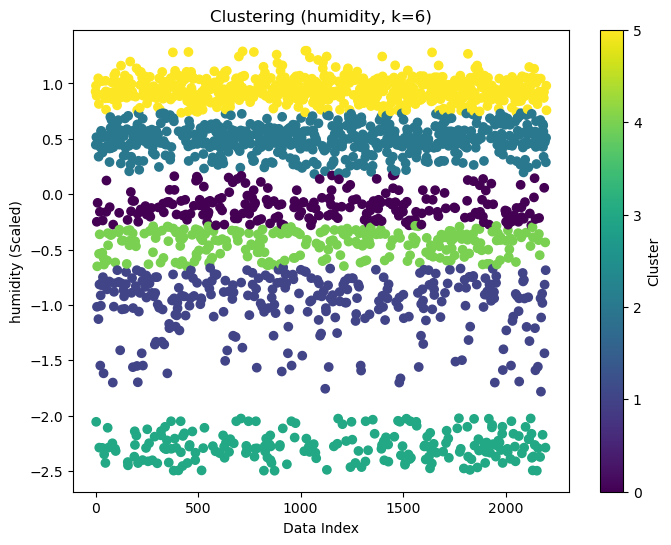


Processing: ph
Optimal clusters for ph: 2


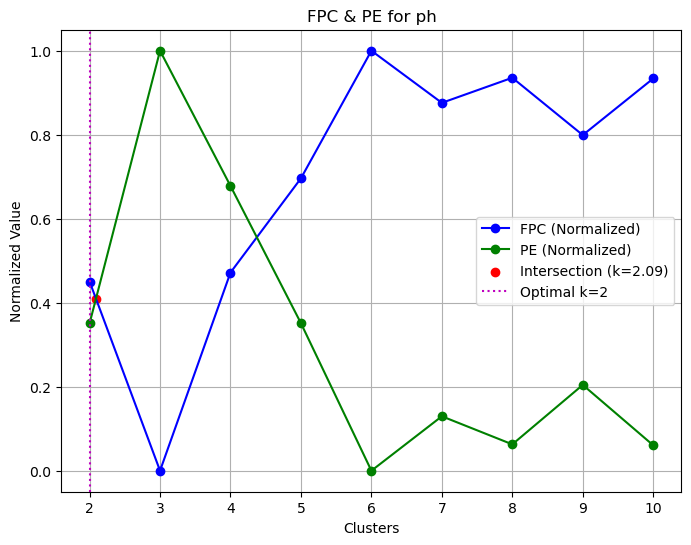

Cluster Centers for ph:
 [[6.36593178]
 [6.62433134]]

Cluster Analysis for ph:
             count      mean       std       min       25%       50%  \
ph_cluster                                                             
0           1785.0  6.336449  0.469794  5.316876  5.952385  6.342573   
1            415.0  7.016787  1.404688  3.504752  7.251424  7.452671   

                 75%       max  
ph_cluster                      
0           6.720744  7.239455  
1           7.806748  9.926212  


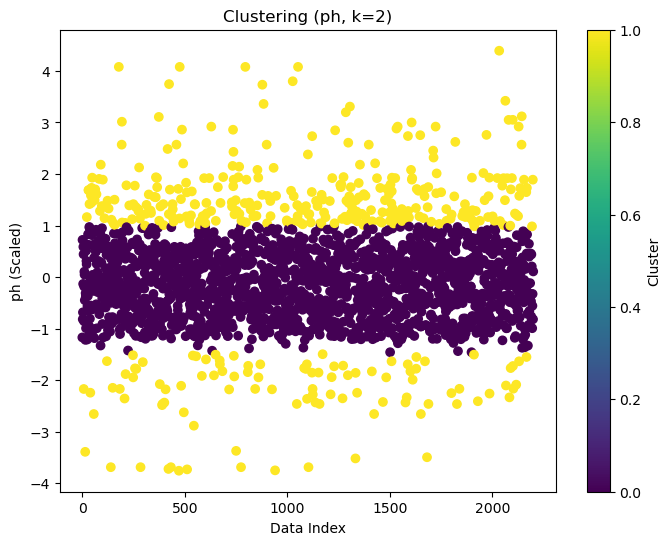


Processing: rainfall
Optimal clusters for rainfall: 7


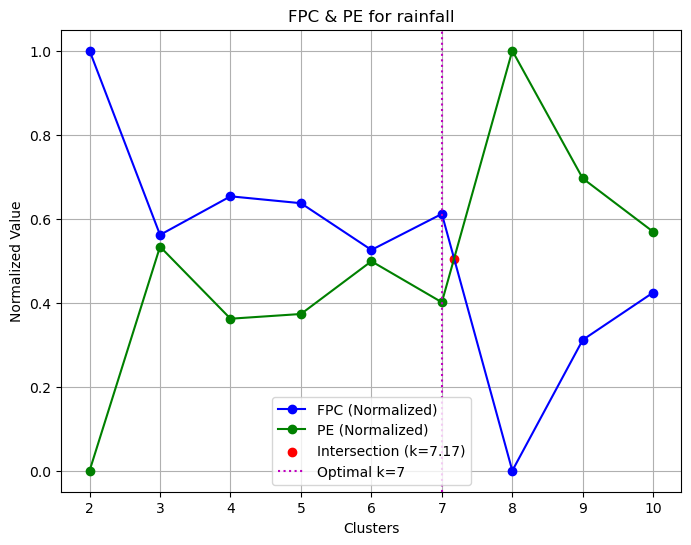

Cluster Centers for rainfall:
 [[103.90675452]
 [186.58327078]
 [ 47.93453527]
 [146.8770791 ]
 [241.86565254]
 [ 69.37386155]
 [ 28.15586951]]

Cluster Analysis for rainfall:
                  count        mean        std         min         25%  \
rainfall_cluster                                                         
0                 754.0  104.072205  10.708343   82.523397   95.151026   
1                 229.0  187.618864  12.013215  166.571288  177.317616   
2                 305.0   47.635287   5.661016   36.918526   43.357954   
3                 189.0  147.220962  11.156748  129.006461  137.704405   
4                  98.0  247.379840  23.587538  214.410385  230.446236   
5                 481.0   69.530897   5.962170   57.449421   65.238111   
6                 144.0   27.399465   5.043249   20.211267   23.482510   

                         50%         75%         max  
rainfall_cluster                                      
0                 104.991282  111.266711  128.2

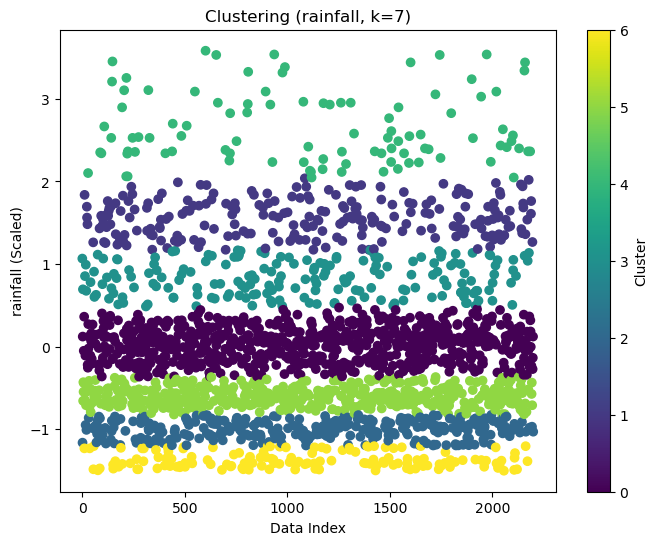


Final Optimal Clusters:
soil_moisture: 4
temperature: 4
humidity: 6
ph: 2
rainfall: 7


In [1]:
#number of clusters and clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("ds1_balanced.csv")

# Fix column names (strip spaces and lowercase for consistency)
df.columns = df.columns.str.strip()
print("Column names in dataset:", df.columns.tolist())  # Print actual column names

# Define expected attributes
expected_attributes = ['soil_moisture', 'temperature', 'humidity', 'ph', 'rainfall']

# Map actual columns (case-insensitive handling)
actual_columns = {col.lower(): col for col in df.columns}  
attributes = [actual_columns[attr.lower()] if attr.lower() in actual_columns else None for attr in expected_attributes]

# Remove missing attributes
attributes = [attr for attr in attributes if attr is not None]
print("Processing attributes:", attributes)  # Ensure all attributes are included

if not attributes:
    raise ValueError("None of the specified attributes were found in the dataset!")

optimal_clusters_dict = {}  # Store results

# Loop through attributes
for attribute in attributes:
    print(f"\nProcessing: {attribute}")

    data = df[[attribute]].values  
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    max_clusters = 10
    fpc_values, pe_values = [], []
    cluster_range = range(2, max_clusters + 1)

    for n_clusters in cluster_range:
        # Apply Gaussian Mixture Model (GMM)
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm.fit(data_scaled)
        
        # Get the fuzzy membership (responsibilities)
        responsibilities = gmm.predict_proba(data_scaled)
        
        # Calculate the FPC (Fuzzy Partition Coefficient)
        fpc = np.sum(responsibilities**2) / len(data_scaled)
        fpc_values.append(fpc)  # Store FPC value
        
        # Calculate the Partition Entropy (PE)
        pe = -np.sum(responsibilities * np.log2(responsibilities + 1e-10)) / len(data_scaled)
        pe_values.append(pe)  # Store PE value

    # Normalize FPC & PE
    fpc_norm = (fpc_values - np.min(fpc_values)) / (np.max(fpc_values) - np.min(fpc_values))
    pe_norm = (pe_values - np.min(pe_values)) / (np.max(pe_values) - np.min(pe_values))

    # Find intersection
    intersection_point = None
    for i in range(len(cluster_range) - 1):
        if (fpc_norm[i] - pe_norm[i]) * (fpc_norm[i + 1] - pe_norm[i + 1]) < 0:
            x1, x2 = cluster_range[i], cluster_range[i + 1]
            y1_fpc, y2_fpc = fpc_norm[i], fpc_norm[i + 1]
            y1_pe, y2_pe = pe_norm[i], pe_norm[i + 1]

            slope_fpc = (y2_fpc - y1_fpc) / (x2 - x1)
            slope_pe = (y2_pe - y1_pe) / (x2 - x1)
            intersection_x = (y1_pe - y1_fpc + slope_fpc * x1 - slope_pe * x1) / (slope_fpc - slope_pe)
            intersection_y = y1_fpc + slope_fpc * (intersection_x - x1)
            intersection_point = (intersection_x, intersection_y)
            break

    # Determine optimal clusters
    optimal_clusters = int(round(intersection_point[0])) if intersection_point else None
    optimal_clusters_dict[attribute] = optimal_clusters
    print(f"Optimal clusters for {attribute}: {optimal_clusters}")

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, fpc_norm, marker='o', linestyle='-', color='b', label='FPC (Normalized)')
    plt.plot(cluster_range, pe_norm, marker='o', linestyle='-', color='g', label='PE (Normalized)')
    plt.title(f'FPC & PE for {attribute}')
    plt.xlabel('Clusters')
    plt.ylabel('Normalized Value')
    plt.xticks(cluster_range)
    plt.grid()
    
    if intersection_point:
        plt.scatter(intersection_point[0], intersection_point[1], color='r', label=f'Intersection (k={intersection_point[0]:.2f})')
        plt.axvline(x=optimal_clusters, color='m', linestyle=':', label=f'Optimal k={optimal_clusters}')

    plt.legend()
    plt.show()

    # Run Gaussian Mixture Model (GMM) for optimal clusters
    if optimal_clusters:
        gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
        gmm.fit(data_scaled)
        cluster_centers = scaler.inverse_transform(gmm.means_)
        print(f"Cluster Centers for {attribute}:\n", cluster_centers)

        cluster_membership = gmm.predict(data_scaled)
        df[f'{attribute}_cluster'] = cluster_membership

        # Print cluster analysis
        print(f"\nCluster Analysis for {attribute}:")
        print(df.groupby(f'{attribute}_cluster')[attribute].describe())

        # Visualize clusters
        plt.figure(figsize=(8, 6))
        plt.scatter(range(len(data_scaled)), data_scaled, c=cluster_membership, cmap='viridis', marker='o')
        plt.title(f'Clustering ({attribute}, k={optimal_clusters})')
        plt.xlabel('Data Index')
        plt.ylabel(f'{attribute} (Scaled)')
        plt.colorbar(label='Cluster')
        plt.show()

# Print summary
print("\nFinal Optimal Clusters:")
for attr, clusters in optimal_clusters_dict.items():
    print(f"{attr}: {clusters}")